In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [219]:
song_all_info = pd.read_csv('../Data/selected_song_all_info.csv')
song_all_info_lyrics = song_all_info[song_all_info['2차 가공'] != '없음']
song_all_info.head(2)

,song id,곡 제목,가수,tag count,tag max,emotion max,곡 세부 장르 리스트,발매일,앨범 명,앨범 ID,...,좋아요수,어제순위,댓글1,댓글2,댓글3,댓글4,댓글5,1차 가공,2차 가공,3차 가공
0,1890,모든게 지나면,화랑,"{'뮤지컬': 1, '사랑': 1}","['뮤지컬', '사랑']","['경쾌한', '행복한']","['GN2902', 'GN1501', 'GN1507', 'GN2901']",20110621,뮤지컬 화랑 OST Vol.2,1315555,...,25,없음,없음,없음,없음,없음,없음,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,"['이', '모든', '것', '다', '지나가다', '또', '시간', '흐르다'..."
1,2491,You Brought A New Kind Of Love To Me,Ella Fitzgerald,"{'연말': 1, '새해': 1}","['연말', '새해']",['행복한'],['GN1701'],20180817,Ella Swings Lightly (Expanded Edition),5644325,...,1,없음,없음,없음,없음,없음,없음,없음,없음,['없다']


In [220]:
song_all_info_lyrics.shape

(704, 35)

In [221]:
song_all_info_lyrics = song_all_info[song_all_info['2차 가공'] != '없음']
#new2 = pd.DataFrame(song_all_info_lyrics[['song id', '2차 가공', '곡 제목', '가수', 'tag count', 'emotion max', '곡 장르 리스트', '대분류str']])
new2 = song_all_info_lyrics
new2.reset_index(inplace=True, drop=False)
#new2.columns=['ori_index', '2차 가공', '곡 제목', '가수', 'tag count', 'emotion max', '곡 장르 리스트', '대분류str']
new2.head(2)

,index,song id,곡 제목,가수,tag count,tag max,emotion max,곡 세부 장르 리스트,발매일,앨범 명,...,좋아요수,어제순위,댓글1,댓글2,댓글3,댓글4,댓글5,1차 가공,2차 가공,3차 가공
0,0,1890,모든게 지나면,화랑,"{'뮤지컬': 1, '사랑': 1}","['뮤지컬', '사랑']","['경쾌한', '행복한']","['GN2902', 'GN1501', 'GN1507', 'GN2901']",20110621,뮤지컬 화랑 OST Vol.2,...,25,없음,없음,없음,없음,없음,없음,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,"['이', '모든', '것', '다', '지나가다', '또', '시간', '흐르다'..."
1,2,2548,마음 (*취급주의),러블리즈,"{'댄스': 8, '새해': 1, '헬스': 1, '운동할때': 1, '카페': 3...",['사랑'],['행복한'],"['GN2503', 'GN0205', 'GN2501', 'GN2506', 'GN02...",20160425,A New Trilogy,...,"11,663",없음,이 노래는 많이 알려져야.. 수록곡으로 머무르기엔 아깝다. ㅠㅜ,'받는 사람 자리에 너의 이름을 쓰고 나 이제 너에게 전할래' 고백한다는 걸 이렇게...,이 노래는 전에 없었던것은 물론이고 앞으로도 없을 한 시대를 평정할 희대의 명곡임이...,중후반부에 단조로 바뀌면서 너를 바라봤었어 담벼락 저 너머로 이부분 너무 좋고 소름...,Cameo-삼각형-미묘미묘해로 이어지는 미친수록곡 라인의 시작,아직 열어보지 말아요 호기심이 생겨도 떨어트리 지도 말아요 그럼 나는 깨져버릴 테니...,아직 열어보지 말아요 호기심이 생겨도 떨어트리 지도 말아요 그럼 나는 깨져버릴 테니...,"['아직', '어보', '말다', '호기심', '생기다', '떨다', '트리', '..."


In [66]:
#!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('paraphrase-distilroberta-base-v1')


In [68]:
embeddings = sbert_model.encode(doc_list, convert_to_tensor=True)



In [69]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [73]:
embeddings.shape

torch.Size([704, 768])

In [79]:
len(embeddings)

704

In [77]:
query = "오늘 하루 난 뭐한건지 잘 모르겠다."
query_vec = sbert_model.encode([query])[0]
query_vec.shape

(768,)

In [83]:
sim_list = []
for i in range(len(embeddings)):
    sim = cosine(query_vec, embeddings[i])
    sim_list.append(sim)
    print("Sentence = ", doc_list[i], "; similarity = ", sim)


Sentence =  이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일이 될까 상처가 나고 그게 아물고 또 그 위에 상처가 나고 다시 아물 때면 그때쯤에는 이 모든 걸 ; similarity =  0.85919666
Sentence =  아직 열어보지 말아요 호기심이 생겨도 떨어트리 지도 말아요 그럼 나는 깨져버릴 테니 여기 내 마음이 있어요 좀 더 조심해줘요 유리같이 섬세한 거니까 자주 혼자 두지 말아요 외로움을 타니까 잃어버리지도 말아요 그럼 난 사라져버릴 테니 쉽게 안심하면 안 돼요 나의 마음이란 건 날씨같이 변할지도 몰라건네줘도 괜찮을까 깜짝 놀라진 않을까 내 마음과 네 마음이 똑같다면 좋겠어꼬깃꼬깃 접은 고백들과 아직 사랑에 서투른 내 맘 조심조심 여기 모두 담아난 보내 보내요 보내 드려요 그대에게 자꾸 다가오지 말아요 아직 거기까지만 빤히 쳐다보지 말아요 그럼 내가 고갤 못 들잖니 우리 조금만 더 걸어요 그냥 지금 이대로 알아요 난 참 생각이 많죠 전부 줘도 괜찮을까 소중하게 지켜줄까 내 마음과 네 마음이 똑같다면 좋겠어꼬깃꼬깃 접은 고백들과 아직 사랑에 서투른 내맘 조심조심 여기 모두 담아난 보내 보내요 보내 드려요 그대에게 차곡차곡 쌓인 비밀들과 이런 감정이 처음인 내 맘 조심조심 여기 모두 담아난 보내 보내요 보내 드려요 너를 바라봤었어 담벼락 저 너머로 사라질 때까지 까치발을 들고서 받는 사람 자리에 너의 이름을 쓰고 나 이젠 너에게 전할래 사랑에 빠진 나의 마음을 받아줘 또 이렇게 막 뛰고 있는데 고깃 고깃 접은 고백들을 난 보내 보내요 보내 드려요 그대에게 차곡차곡 쌓인 비밀들과 이런 감정이 처음인 내 맘 조심조심 여기 모두 담아난 보내 보내요 보내 드려요 그대에게 ; similarity =  0.77952904
Sentence =  너를 맘에 담고 나는 눈을 감고 우리의 추억을 떠올리며 살아 항상 행복했던 우리 기억 속에 나는 살아가고 있는데 너를 묻어두고 나는 눈을 감고 이젠 함께 할 수 없는 너와 나

Sentence =  멀리 말하면 나는 어쨌든 아픈 말을 하는 것을 모른다 오늘은 당신을 찾을 수 있는 또 다른 날 당신의 사랑을 위해 아프다 아픈 나에게 가져가라 나를 데려가 라 나 아픈 사람이 나오지 않아서 말할 필요가 없어 나는 확산과 끝이지만 아프다 아프다 천천히 그 삶이 괜찮다고 말하면서 미안해 나에게 가져가라나 나를 데려가 라 나는 하루에 나갔다 ; similarity =  0.82971925
Sentence =  언젠가 이곳이 우리에겐 가장 그리운 곳이 될지 몰라요 향긋한 유채 향기 그윽한 파도 소리에 이렇게 당신과 둘이 있는 지금 이 순간 영원히 머물고 싶어 잊을 수 없는 날이 될 거야 흔들리고 있어 내 맘 사랑하고 있어 그분을 설렘에 가슴 벅찬 내 맘 구석에 모든 걸 묻고 따르고 싶어 이 분과 함께라면 받아들일 수 있어 하지만 안돼 안돼 그럴 순 없어 나 때문에 돌아가신 우리 마마님과 어머니의 원한이 풀리고 모두의 진실이 밝혀지는 그날까지 당신 손을 잡고 이대로 여기서 살고 싶어 평범한 남자와 여인 되어 하나 내 맘속에 넣어두리 그대 가는 길 막지 않아 그댄 자유로운 영혼 그저 바라만 봐도 힘이 되는 당신을 나는 잡을 수가 없네요 언젠가 이곳 그리워하겠지 지울 수 없겠지 당신 때문에 ; similarity =  0.83134264
Sentence =  오늘도 내 기분은 막내여서 어제보다 주눅과 친해져요 결국엔 눈물들이 다 베어서 나의 왼뺨에 내려가요 나 울고 싶을 땐 많이 울으라고 사탕같이 예쁜 말투를 물려줄 하늘이 바랄 땐 저건 파랗다고 멋있게 말하는 긴 시가 돼줄 사람 없인 사람으로 못 살아요 혼자 손 따는 것도 어려워요 사람 없는 한강은 무서워요 우리 정들어 버렸네요 고맙단 말 간신히 할 때마다 처음 발음부터 눈물이 고여 단어들과 모여서 함께 살아 우리 입술의 참한 내음 나 죽고 싶을 땐 좀만 더 살자고 무심하게 돌아 등 뒤로 안아 줄 떠나도 괜찮아 억지로 밀어도 아랑곳 안 하는 긴 시가 돼줄 사람 없인 사람으로 못 살아요 혼자 손 따는 

Sentence =  I dont care about tomorrow 지금은 여기가 좋아의 파란 방에선 내 생각이 전부 전시되니까 Yeah 너도 come with me 춤을 추고 놀아 이 공간엔 너와 내 생각만 계속 반짝이니까 서롤 잃어버릴 일도 없을 거야 Lets boogie on and on 내 손이 어디로 가는지도 잘 모르게끔 이 시원한 조명이 내 머릴 밝힐 때 새로운 감정을 느끼지 Yeah 그래 이 위에 올라타서 그 술을 털어줘 넌 계속 눈을 맞춰 나와 yeah baby all night longI don’t care bout where I goDrink a lot of liquorYeah I’m outta controlSlip and slide with you babyLike a soap 오늘 밤은 내버려 둬 좀 취해도 이해해줘내려놓자 모든 걱정도 Now I’m feel so high 밖은 어둡지 아직 시간이 아냐 더 퍼부어야 오지 해는 아깝지 않다는 듯이 몸을 움직이고 생각하는 것들을 전부 다 표현해 여긴 그렇게 하는 게 맞아 Yeah 쟤는 너무 조용해 재 쟤는 또 뭐길래 계 계속 껴드는지 Aye aye 난 모르겠네 있는 걸 다 퍼붓지 세상이 더 뿌옇게 Wait wait 좀 더 까맣게 Wait wait 좀 더 까맣게네 폰은 거기 놔둬 방해받지 않게 경험은 중요하지 너무 들뜨게 됐거든 내가 또 다른 차원에 붕 떠 있는 느낌 세상을 등지고 가 여긴 숨조차도 달지 숨조차도 달지 우린 하나가 되고 달콤한 호흡을 나누게 될 거란 걸 나는 아 네이 파란 우주 속 빛나는 조명 아래 긴장되어 있는 내 심장이 터질 것만 같이 I don’t care bout where I goDrink a lot of liquArea I’m outta controlSlip and slide with you baby Like a soap 오늘 밤은 내버려 둬 좀 취해도 이해해줘내려놓자 모든 걱정도 Now I’m feel so high Whoa Whoa Whoadont be waitin

In [89]:
df = pd.DataFrame(sim_list, columns=['sim'])
df

,sim
0,0.859197
1,0.779529
2,0.808036
3,0.866986
4,0.829501
...,...
699,0.832059
700,0.839696
701,0.672231
702,0.838079


In [93]:
df.nlargest(5, 'sim')

,sim
415,0.897946
309,0.897141
18,0.892909
34,0.888745
643,0.887397


In [94]:
df.nlargest(5, 'sim').index

Int64Index([415, 309, 18, 34, 643], dtype='int64')

In [99]:
result = sentences[df.nlargest(5, 'sim').index]
result

415    오늘은 왠지 설레어 오래간만에 기분 좋은 바람 별것도 아닌 게 날 웃게 해 반복에 ...
309    하루도 하루도 하루도 쉰 적 없어 조금씩 조금씩 조금씩 널 향해서 한걸음 한걸음 한...
18     하늘에 두둥실 떠올라 모던 걸 가진 이 기분네가 내게 오던 날 다시 태어난 거야 오...
34     단 한 마디만 제발 내게 대답해줘요 이 꼴이 당신이 바라던 모습인가요 왕이 될 수 ...
643    따스한 봄바람 날씨 체크 완료 가벼운 옷차림 이미 준비 완료 주말에 데이트할래 벌써...
Name: lyrics, dtype: object

In [100]:
query

'오늘 하루 난 뭐한건지 잘 모르겠다.'

In [102]:
result.iloc[0]

'오늘은 왠지 설레어 오래간만에 기분 좋은 바람 별것도 아닌 게 날 웃게 해 반복에 반복된 하루가 내겐 다 무채색 이런 내게 네가 나타났어 어서 밟어 우리 관계 beep beep 출발해 둘이 신나게 이미 들떠있어 오늘 밤엔 칙칙하게 보내기 싫지 그래서 소원을 빌지 빌빌 빌어 나의 지니님 소원을 말해봐 안 들어줌 GG 치지 지치기 싫어 지금 이 감정 24 hour 내게 딱 하루만 줘믿을 수가 없어 거짓말 꿈에서만 보던 이상형 오늘은 어떤 향기로 날 홀릴지 들었다 놨다 나를 미치게 해 논 롤러코스터 어떤 말로 표현할 수 없는 기분 내게 주문을 걸었느니 앞에 서면 터질 것 같아느리게 혹은 빠르게 매일 반복돼 마치 롤러코스터 Oh god 풀려버린 동공 널 보자마자 하는 일 내려놓고 마치 뭐에 홀린 듯이 마치 뭐에 미친 듯이 본능적으로느낌적인 느낌이 왔어 Girl you gotta feelin this problem 지금 네게 전속력으로 떨어져 많은 생각 마 어차피 사고 나게 돼 있어믿을 수가 없어 거짓말 꿈에서만 보던 이상형 오늘은 어떤 향기로 날 홀릴지 들었다 놨다 나를 미치게 해 논 롤러코스터 어떤 말로 표현할 수 없는 기분 내게 주문을 걸었느니 앞에 서면 터질 것 같아느리게 혹은 빠르게 매일 반복돼 마치 롤러코스터 순간 천천히 슬로모션처럼 마법에 빠진 것만 같은 걸 너의 이름은 이제부터 baby baby baby 날 들었다 놨다 하는 넌 bad girl 날 이제 제발 가만히 좀 내버려 둬 빠르던 느리던 변함이 없어 롤러코스터 네가 내 끝이었어 넌 롤러코스터 어떤 말로 표현할 수 없는 기분 내게 주문을 걸었느니 앞에 서면 터질 것 같아느리게 혹은 빠르게 매일반복돼 마치 롤러코스터'

# test: 가사만 sentence embedding으로 cosin
- https://towardsdatascience.com/mastering-word-embeddings-in-10-minutes-with-tensorflow-41e25da6aa54
- https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/
- https://www.infoking.site/52

In [105]:
song_all_info.columns

Index(['song id', '곡 제목', '가수', 'tag count', 'tag max', 'emotion max',
       '곡 세부 장르 리스트', '발매일', '앨범 명', '앨범 ID', '아티스트 ID 리스트', '곡 장르 리스트',
       '아티스트 리스트', '대분류str', '소분류str', 'tags', '우울한', '울고싶은', '긴장되는', '무서운',
       '잔잔한', '행복한', '경쾌한', '편안한', '원가사', '좋아요수', '어제순위', '댓글1', '댓글2', '댓글3',
       '댓글4', '댓글5', '1차 가공', '2차 가공', '3차 가공'],
      dtype='object')

In [107]:
data = song_all_info[song_all_info['울고싶은'] > 0.0]
data.reset_index(drop=True, inplace=True)

In [114]:
data['3차 가공']

0     ['견디다', '수', '없다', '차다', '수', '없다', '잊다', '수',...
1                                                ['없다']
2                                                ['없다']
3     ['그냥', '친하다', '치다', '척', '남자', '사람', '치다', '척'...
4     ['멀리', '돌아오다', '길이', '늦다', '그게', '미안하다', '항상',...
                            ...                        
62    ['많이', '아프다', '더', '많이', '미워하다', '다시', '그', '대...
63    ['눈', '반하다', '안', '믿다', '보다', '사랑', '하다', '하다'...
64    ['나', '훈련', '하다', '보트', '훈련', '시키다', '훈련', '훈련...
65    ['오늘', '날씨', '좋다', '함께', '길', '걷다', '건', '어떻다'...
66    ['홀로', '카페', '문', '열다', '보다', '쓰다', '쓸다', '커피'...
Name: 3차 가공, Length: 67, dtype: object

In [115]:
query = "오늘 하루 난 뭐한건지 잘 모르겠다."
query_vec = sbert_model.encode([query])[0]
query_vec.shape

sim_list = []
for i in range(len(data['3차 가공'])):
    sim = cosine(query_vec, sbert_model.encode([data['3차 가공'][i]])[0])
    sim_list.append(sim)
    #print("Sentence = ", doc_list[i], "; similarity = ", sim)

In [122]:
df = pd.DataFrame(sim_list, columns=['sim'])
result = data['3차 가공'][df.nlargest(5, 'sim').index]
result

37    ['싸늘하다', '가을', '밤', '거리', '바람', '흔들리다', '풍경', ...
55    ['숨다', '수가', '없다', '네', '표정', '말투', '하나', '다',...
31    ['매일', '밤', '나르다', '스치다', '그대', '시간', '깊다', '밤...
46    ['불어오다', '바람', '그대', '생각나다', '차갑다', '손끝', '바람'...
41    ['그대', '쉬다', '않다', '하루', '이다', '마음먹다', '일', '하...
Name: 3차 가공, dtype: object

In [132]:
selected = data.iloc[df.nlargest(5, 'sim').index]
selected[['곡 제목', '가수', 'emotion max', '원가사']]

,곡 제목,가수,emotion max,원가사
37,가을밤,정성우,['우울한'],싸늘한 가을밤 거리엔바람에 흔들리는 풍경떨어진 낙엽들로 가득해진가을밤의 거리는나를...
55,네 생각으로 멈추지 않는 밤 (Feat. 109),소각소각,['우울한'],숨길 수가 없는 네 표정말투 하나까지도다 묻어나는 지금 우리 상황이 그래한참을 바...
31,이별이라는 밤,맥켈리,['잔잔한'],매일밤 나를 스치는 그대라는 시간이깊어지는 밤으로 자꾸 나를 이끌어이제 더는 우리라...
46,바람부는 날,하비누아주,"['무서운', '잔잔한']",불어오는 바람에 그대가 생각나 차가운 손끝으로 바람을 만지네그대 떠난 그 날도 바...
41,I Do,어쿠스틱 콜라보,['행복한'],그대여 쉽지않은 하루였죠마음먹은일 하나도 되지않는힘든 하루였죠그대의 그런마음 알아...


In [136]:
selected.iloc[0]['원가사']

' 싸늘한 가을밤 거리엔바람에 흔들리는 풍경떨어진 낙엽들로 가득해진가을밤의 거리는나를 비추고 나를 채우네혼자 걸어보는 게 얼마만인지나를 비추고 나를 채우네가을이 물드네나를 비추고 나를 채우네혼자 걸어보는 게 얼마만인지나를 비추고 나를 채우네가을이 물드네싸늘한 가을밤 거리엔바람에 흔들리는 풍경떨어진 낙엽들로 가득해진가을이 물드네 '

# 2. 오토인코더 적용 with 태그

In [222]:
song_all_info.columns

Index(['song id', '곡 제목', '가수', 'tag count', 'tag max', 'emotion max',
       '곡 세부 장르 리스트', '발매일', '앨범 명', '앨범 ID', '아티스트 ID 리스트', '곡 장르 리스트',
       '아티스트 리스트', '대분류str', '소분류str', 'tags', '우울한', '울고싶은', '긴장되는', '무서운',
       '잔잔한', '행복한', '경쾌한', '편안한', '원가사', '좋아요수', '어제순위', '댓글1', '댓글2', '댓글3',
       '댓글4', '댓글5', '1차 가공', '2차 가공', '3차 가공'],
      dtype='object')

In [145]:
song_all_info_lyrics = song_all_info[song_all_info['2차 가공'] != '없음']
new2 = pd.DataFrame(song_all_info_lyrics[['2차 가공', '곡 제목', '가수', 'tag count', 'emotion max', '곡 장르 리스트', '대분류str']])
new2.reset_index(inplace=True, drop=False)
new2.columns=['ori_index', '2차 가공', '곡 제목', '가수', 'tag count', 'emotion max', '곡 장르 리스트', '대분류str']
import re
x = [', '.join(re.findall('[ㄱ-ㅣ가-힣]+', new2['tag count'][i])) for i in range(len(new2))]
new2['tag_ori'] = x
new2.head(2)

,ori_index,2차 가공,곡 제목,가수,tag count,emotion max,곡 장르 리스트,대분류str,tag_ori
0,0,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,모든게 지나면,화랑,"{'뮤지컬': 1, '사랑': 1}","['경쾌한', '행복한']","['GN1500', 'GN2900']","GN1500,GN2900","뮤지컬, 사랑"
1,2,아직 열어보지 말아요 호기심이 생겨도 떨어트리 지도 말아요 그럼 나는 깨져버릴 테니...,마음 (*취급주의),러블리즈,"{'댄스': 8, '새해': 1, '헬스': 1, '운동할때': 1, '카페': 3...",['행복한'],"['GN2500', 'GN0200']","GN2500,GN0200","댄스, 새해, 헬스, 운동할때, 카페, 드라이브, 신나는, 비오는날, 기분전환, 봄..."


In [224]:
from sklearn.model_selection import train_test_split

train2, valid2 = train_test_split(new2, test_size=0.2, random_state=42)

In [225]:
train2.sample()

,index,song id,곡 제목,가수,tag count,tag max,emotion max,곡 세부 장르 리스트,발매일,앨범 명,...,좋아요수,어제순위,댓글1,댓글2,댓글3,댓글4,댓글5,1차 가공,2차 가공,3차 가공
529,795,488004,Don`t act,장우영,"{'겨울': 1, '잔잔한': 1, '추억': 1, '드라이브': 1, '위로': ...","['겨울', '잔잔한', '추억', '드라이브', '위로', '기분전환', '사랑']",['행복한'],"['GN2502', 'GN2501', 'GN2504', 'GN0301']",20180115,헤어질 때,...,"1,784",없음,너무 좋아ㅠㅠㅠㅠㅠ,이거 존좋.. 읊조린다고 해야되나 그런식으로 부르는거 준호가 짱인줄 알았는데 아닌네...,돈 액트 미쳤네....,최애 목소리..ㅠㅠ 너무좋아요 뚝도 너무좋고 활동 많이 해줘요ㅠㅠ엉어유ㅠ,이노래 좋아요♡,스쳐가던 사이에 너무 차가운 얼굴 얼굴 허무해진 내 삶에 더는 없어 너는 없어 마주...,스쳐가던 사이에 너무 차가운 얼굴 얼굴 허무해진 내 삶에 더는 없어 너는 없어 마주...,"['스치다', '사이', '너무', '차갑다', '얼굴', '얼굴', '허무하다',..."


In [155]:
train2['2차 가공'].shape

(563,)

In [158]:
# 시간 오래 걸림
train_vector_lyrics2 = sbert_model.encode(train2['2차 가공'].values, convert_to_tensor=True)
valid_vector_lyrics2 = sbert_model.encode(valid2['2차 가공'].values, convert_to_tensor=True)

train_vector_tag2 = sbert_model.encode(train2['tag_ori'].values, convert_to_tensor=True)
valid_vector_tag2 = sbert_model.encode(valid2['tag_ori'].values, convert_to_tensor=True)

In [159]:
print(train_vector_lyrics2.shape)
print(train_vector_tag2.shape)

torch.Size([563, 768])
torch.Size([141, 768])


In [165]:
train_vector_lyrics22 = tf.Variable(train_vector_lyrics2)
valid_vector_lyrics22 = tf.Variable(valid_vector_lyrics2)
train_vector_tag22 = tf.Variable(train_vector_tag2)
valid_vector_tag22 = tf.Variable(valid_vector_tag2)
print(train_vector_lyrics22.shape)

(563, 768)


In [167]:
train_vector_lyrics22 = train_vector_lyrics22.numpy()
valid_vector_lyrics22 = valid_vector_lyrics22.numpy()
train_vector_tag22 = train_vector_tag22.numpy()
valid_vector_tag22 = valid_vector_tag22.numpy()
print(train_vector_lyrics22.shape)

(563, 768)


In [168]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization, Concatenate
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

Xinput = Input(shape=(train_vector_lyrics22.shape[1],))
Yinput = Input(shape=(train_vector_tag22.shape[1],))

Xencoded = Dense(400, activation='relu')(Xinput)
Xencoded = Dense(40, activation='relu')(Xencoded)


Yencoded = Dense(400, activation='relu')(Yinput)
Yencoded = Dense(40, activation='relu')(Yencoded)

shared_input = Concatenate()([Xencoded, Yencoded])
shared_output = Dense(20, activation='relu')(shared_input)

Xdecoded = Dense(40, activation='relu')(shared_output)
Xdecoded = Dense(400, activation='relu')(Xdecoded)
Xdecoded = Dense(train_vector_lyrics2.shape[1], activation='relu')(Xdecoded)

Ydecoded = Dense(40, activation='relu')(shared_output)
Ydecoded = Dense(400, activation='relu')(Ydecoded)
Ydecoded = Dense(train_vector_tag2.shape[1], activation='relu')(Ydecoded)

# define autoencoder model and compile
model2 = Model(inputs=[Xinput, Yinput], outputs=[Xdecoded, Ydecoded])
model2.compile(optimizer='adam', loss=['mse', 'mse'], loss_weights=[1., 1.])

# plot the autoencoder
#plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history2 = model2.fit([train_vector_lyrics22, train_vector_tag22], [train_vector_lyrics22, train_vector_tag22],
                    validation_data = ([valid_vector_lyrics22, valid_vector_tag22], [valid_vector_lyrics22, valid_vector_tag22]),
                    epochs = 50, batch_size = 32, verbose=2)

Epoch 1/50
18/18 - 2s - loss: 0.1263 - dense_29_loss: 0.0669 - dense_32_loss: 0.0594 - val_loss: 0.1088 - val_dense_29_loss: 0.0575 - val_dense_32_loss: 0.0513 - 2s/epoch - 90ms/step
Epoch 2/50
18/18 - 0s - loss: 0.1066 - dense_29_loss: 0.0564 - dense_32_loss: 0.0502 - val_loss: 0.1055 - val_dense_29_loss: 0.0560 - val_dense_32_loss: 0.0495 - 255ms/epoch - 14ms/step
Epoch 3/50
18/18 - 0s - loss: 0.1044 - dense_29_loss: 0.0554 - dense_32_loss: 0.0490 - val_loss: 0.1039 - val_dense_29_loss: 0.0551 - val_dense_32_loss: 0.0488 - 226ms/epoch - 13ms/step
Epoch 4/50
18/18 - 0s - loss: 0.1031 - dense_29_loss: 0.0547 - dense_32_loss: 0.0484 - val_loss: 0.1032 - val_dense_29_loss: 0.0547 - val_dense_32_loss: 0.0485 - 235ms/epoch - 13ms/step
Epoch 5/50
18/18 - 0s - loss: 0.1025 - dense_29_loss: 0.0544 - dense_32_loss: 0.0481 - val_loss: 0.1027 - val_dense_29_loss: 0.0544 - val_dense_32_loss: 0.0483 - 292ms/epoch - 16ms/step
Epoch 6/50
18/18 - 0s - loss: 0.1021 - dense_29_loss: 0.0542 - dense_32_l

Epoch 45/50
18/18 - 0s - loss: 0.0881 - dense_29_loss: 0.0470 - dense_32_loss: 0.0411 - val_loss: 0.0913 - val_dense_29_loss: 0.0495 - val_dense_32_loss: 0.0418 - 232ms/epoch - 13ms/step
Epoch 46/50
18/18 - 0s - loss: 0.0877 - dense_29_loss: 0.0469 - dense_32_loss: 0.0408 - val_loss: 0.0912 - val_dense_29_loss: 0.0495 - val_dense_32_loss: 0.0417 - 199ms/epoch - 11ms/step
Epoch 47/50
18/18 - 0s - loss: 0.0875 - dense_29_loss: 0.0468 - dense_32_loss: 0.0407 - val_loss: 0.0911 - val_dense_29_loss: 0.0494 - val_dense_32_loss: 0.0417 - 256ms/epoch - 14ms/step
Epoch 48/50
18/18 - 0s - loss: 0.0872 - dense_29_loss: 0.0466 - dense_32_loss: 0.0405 - val_loss: 0.0907 - val_dense_29_loss: 0.0494 - val_dense_32_loss: 0.0413 - 199ms/epoch - 11ms/step
Epoch 49/50
18/18 - 0s - loss: 0.0869 - dense_29_loss: 0.0465 - dense_32_loss: 0.0404 - val_loss: 0.0906 - val_dense_29_loss: 0.0492 - val_dense_32_loss: 0.0414 - 198ms/epoch - 11ms/step
Epoch 50/50
18/18 - 0s - loss: 0.0867 - dense_29_loss: 0.0464 - d

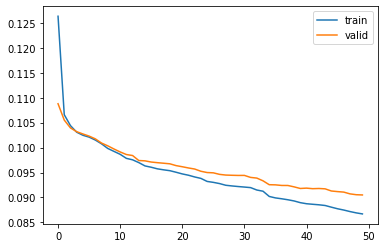

In [169]:
# plot loss
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='valid')
pyplot.legend()
pyplot.show()

In [170]:
# 인코더 모델 저장
encoder2 = Model(inputs=[Xinput, Yinput], outputs=shared_output)
#plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
#encoder.save('encoder.h5')

In [176]:
# encode the train data

vector_lyrics = sbert_model.encode(new2['2차 가공'].values, convert_to_tensor=True)
vector_tags = sbert_model.encode(new2['tag_ori'].values, convert_to_tensor=True)

vector_lyrics = vector_lyrics.numpy()
vector_tags = vector_tags.numpy()

latent_variables2 = encoder2.predict([vector_lyrics, vector_tags])
latent_variables2.shape

(704, 20)

## test

In [182]:
# encode the train data
text = "오늘 하루 난 뭐한건지 잘 모르겠다."
input_tag = "공허, 피곤" #듣고 싶은 노래 유형 #근데 스웩, 힙합하면 없음.

test = sbert_model.encode([text], convert_to_tensor=False)
input_tag_test = sbert_model.encode([input_tag], convert_to_tensor=False)

#test = test.numpy()
#input_tag_test = input_tag_test.numpy()

test_latent = encoder2.predict([test, input_tag_test])
test_latent.shape

(1, 20)

In [183]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [229]:
sim_list = []
for i in range(len(latent_variables2)):
    sim = cosine(test_latent, latent_variables2[i])
    sim_list.append(sim)
    #print("Sentence = ", doc_list[i], "; similarity = ", sim)

In [231]:
df = pd.DataFrame(sim_list, columns=['sim'])
df.nlargest(5, 'sim')

,sim
365,0.995962
384,0.995854
383,0.995125
420,0.994871
16,0.994838


In [237]:
# 오토인코더 추천 값 확인
new2['2차 가공'][df.nlargest(5, 'sim').index]

365    나는 그것이 여름이 끝날 때까지 얼마나 따뜻하게 시작했는지 기억하고 우리의 작은 삶...
384    싸늘한 가을밤 거리엔 바람에 흔들리는 풍경 떨어진 낙엽들로 가득해진 가을밤의 거리는...
383    가을밤 그대와 거닐던 그 기억 따라서 난 꿈을 꾸었지 당신과 만났던 그날 밤 그 기...
420    나는 내 이빨을 닦고 거울을 보아고 내가 귀의에서 빛을 막아서 싸움 대신에 꽃을 푸...
16     넌 왼쪽이 편하다고 늘 내 왼쪽으로 걸었어내 뛰는 심장과 가까운 자리라며 늘 내 왼...
Name: 2차 가공, dtype: object

In [261]:
# 합치기: 오토인코더값:0.8, 분위기:0.2
new2['fin_score'] = df*0.8
new2['fin_score'] += new2['울고싶은']*6

In [268]:
selected_songs = new2.iloc[new2.nlargest(5, 'fin_score').index]
selected_songs[['song id', '곡 제목', '가수', 'tag count', 'emotion max',
       '아티스트 리스트', 'tags', '원가사', '1차 가공', '2차 가공', '3차 가공', 'fin_score']]

,song id,곡 제목,가수,tag count,emotion max,아티스트 리스트,tags,원가사,1차 가공,2차 가공,3차 가공,fin_score
100,96240,Pena De Los Amores (2016 Remastered),Linda Ronstadt,"{'애절한': 1, '추억': 1, '감성적인': 1}","['울고싶은', '행복한', '잔잔한']",['Linda Ronstadt'],듣기편한음악 세상의모든음악지역별 라틴 Latin 애절한 월드뮤직 추억 린다론스태드 ...,Que pena de las palabras que se callaronY aqu...,불가사의 한 단어의 동정이 있고 꽃이나 노래가 없는 봄 슬픔을 잊어버렸습니다. 그분...,불가사의 한 단어의 동정이 있고 꽃이나 노래가 없는 봄 슬픔을 잊어버렸습니다 그분의...,"['불가사의', '하다', '단어', '동정', '있다', '꽃', '노래', '없...",2.783383
137,129222,Goodbye,Def Leppard,"{'슬픔': 1, '사랑': 1, '아픔': 1, '이별': 1}",['우울한'],['M.Spot'],감성 발라드 취향저격 RnB 명곡 슬픔 사랑 아픔 이별,"I've Been Waiting, Goin' Crazy ICan't Sleep W...","나는 기다리고 있었고, 미친 듯이 네가 알지 못할 때 자면 나는 네가 내 얼굴을 봐...",나는 기다리고 있었고 미친 듯이 네가 알지 못할 때 자면 나는 네가 내 얼굴을 봐야...,"['나', '기다리다', '있다', '미치다', '듯이', '네', '알', '하다...",2.288410
136,129222,Goodbye,M.Spot,"{'슬픔': 1, '사랑': 1, '아픔': 1, '이별': 1}",['우울한'],['M.Spot'],감성 발라드 취향저격 RnB 명곡 슬픔 사랑 아픔 이별,다 지울수 있다고 멍든 가슴을 또 눈물로 닦아도터질듯 가득찬 기억이 새어나와 힘들게...,다 지울 수 있다고 멍든 가슴을 또 눈물로 닦아도 터질 듯 가득 찬 기억이 새어 나...,다 지울 수 있다고 멍든 가슴을 또 눈물로 닦아도 터질 듯 가득 찬 기억이 새어 나...,"['다', '지우다', '수', '있다', '멍', '가슴', '또', '눈물', ...",2.282583
457,410471,시간이 안 지나가 (Walkin` In Time),더보이즈 (THE BOYZ),"{'이별': 2, '새벽': 1, '눈물': 1, '그리움': 1, '애절한': 1...",['우울한'],['더보이즈 (THE BOYZ)'],이별 새벽재현 엔시티의나잇나잇 재디 쟌디 엔나나 쟈니노래 추천 숨은명곡 아이돌 발라...,시간이 안 지나가 너 없는 나를 no니가 아직 내게 남아 날 아프게만 해가만히 앉아...,시간이 안 지나가 너 없는 나를 no 네가 아직 내게 남아 날 아프게만 해 가만히 ...,시간이 안 지나가 너 없는 나를 no 네가 아직 내게 남아 날 아프게만 해 가만히 ...,"['시간', '안', '지나가다', '너', '없다', '나르다', '네', '아직...",1.488672
380,331038,사랑은 유리 같은 것,핑클 (Fin.K.L),"{'추억': 3, '댄스': 1, '드라이브': 1, '슬픔': 1, '기분전환':...",['행복한'],['핑클 (Fin.K.L)'],레인보우 카라 SES 핑클발라드핑클 걸그룹 추억 캠핑클럽 이효리 성유리 이진 옥주현...,정말 몰랐어요사랑이란 유리 같은 것아름답게 빛나지만깨어지기 쉽다는 걸이제 깨어지는...,정말 몰랐어요 사랑이란 유리 같은 것 아름답게 빛나지만 깨어지기 쉽다는 걸이제 깨어...,정말 몰랐어요 사랑이란 유리 같은 것 아름답게 빛나지만 깨어지기 쉽다는 걸이제 깨어...,"['정말', '모르다', '사랑', '유리', '같다', '것', '아름답다', '...",1.375644
